In [1]:
# -*- coding: utf-8 -*-

##    Description    Tools for qualitative endpoints
##                   
##    Authors:      Kevin Pinto Gil (kevin.pinto@upf.edu)
##                  Manuel Pastor (manuel.pastor@upf.edu) 
##
##    Copyright 2013 Manuel Pastor
##
##    This file is part of eTOXlab.
##
##    eTOXlab is free software: you can redistribute it and/or modify
##    it under the terms of the GNU General Public License as published by
##    the Free Software Foundation version 3.
##
##    eTOXlab is distributed in the hope that it will be useful,
##    but WITHOUT ANY WARRANTY; without even the implied warranty of
##    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
##    GNU General Public License for more details.
##
##    You should have received a copy of the GNU General Public License
##    along with eTOXlab.  If not, see <http://www.gnu.org/licenses/>.

import urllib
import os
import sys
import getopt
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
# %matplotlib


In [32]:
def FourfoldDisplay(TP, TN, FP, FN, label, name, endpoint):
    """ Draws confusion matrix graphical representation
    Usage:
        44Display.py -a TP -b  TN -c FP -d FN -l label -n name
        Display.py -a 10 -b 50 -c 20 -d 50 -l "PLS Predicted Confusion Matrix"
                     -n RF_predicted_confusion_matrix.png -e Nonneoplasic
    """
    print TP, TN, FP, FN
    TP = float(TP)
    TN = float(TN)
    FP = float(FP)
    FN = float(FN)
    print TP + TN
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    print 'sens', sensitivity, 'spec', specificity
    width = np.pi / 2.0
    theta = np.radians([0,90,180,270])
    table = [FP,TP,FN,TN]
##    plt.figure("RF-Qualitative_validation")

    my_dpi = 96 ### size of my figure
    fig0 = plt.figure(figsize=(1250/my_dpi, 800/my_dpi))

    plt.clf()
    ax = plt.subplot(121, polar=True, adjustable='box', aspect=1)    
    bars = ax.bar(theta, table, width=width, color=["red", "lightblue", "red", "lightblue"])
##    plt.title( label )

    ax.set_xticklabels(["","FP (%s) \n\n" % str(int(FP)), "",  "TP (%s) \n\n" % str(int(TP)),
                        "", "\n\n\nFN (%s)" % str(int(FN)), 
                        "",  "\n\n\nTN (%s)" % str(int(TN))], fontsize=14)
    ax.set_yticks([])
    ax.grid(False)
    ax.axes.spines['polar'].set_visible(False)
    
    ax2 = plt.subplot(122, adjustable='box', aspect=3)
    plt.ylim([0,1])
#     plt.title(endpoint+'\n')
    
    bar_width = 0.5
    y = [0, sensitivity, specificity, 0]
    index = np.arange(4)
    ax2.bar(index, y, bar_width, color=["lightgreen","lightgrey"])
#     ax.offset(0.5)
    plt.xticks( index + bar_width / 2.0, ("", 'Sensitivity', 'Specificity', ""))
    plt.show()
    
    fig0.savefig(name)

In [33]:
### Input files definition

TP = 100 ## True positives
TN = 200 ## True Negatives
FP = 30 ## False Positives
FN = 10 ## False Negatives
label = "RF Predicted Confusion Matrix" ## graph title
name = "RF_predicted_confusion_matrix.png" ## file name
endpoint = "Nonneoplasic" ## graph title

100 200 30 10
300.0
sens 0.909090909091 spec 0.869565217391


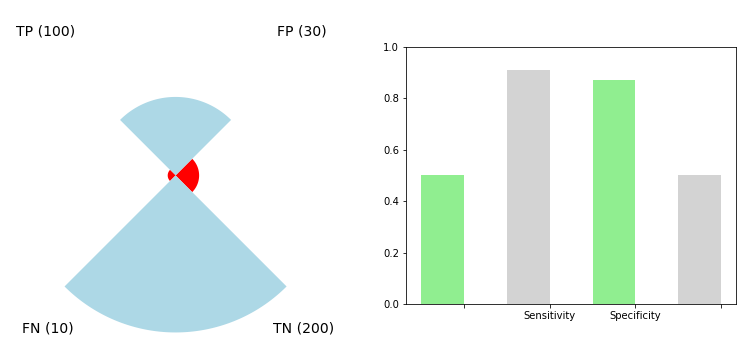

In [34]:
FourfoldDisplay(TP, TN, FP, FN, label, name, endpoint)